# Getting started with classification

## Introduction to classification

### clean and balance your data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

df  = pd.read_csv('cuisines.csv')
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


### discover the distribution of data

<Axes: ylabel='cuisine'>

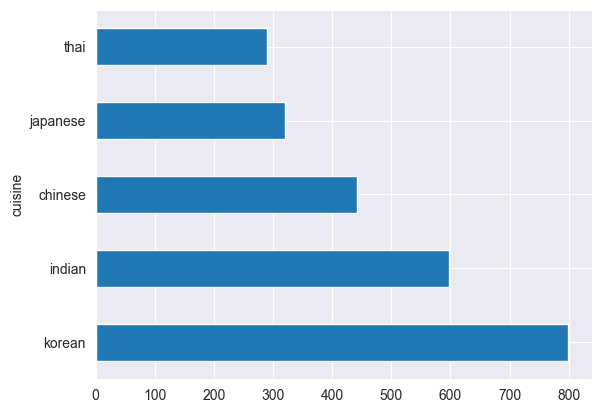

In [8]:
df.cuisine.value_counts().plot.barh()

In [9]:
# Find out how much data is available per cuisine

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

print(thai_df)

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)
      Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
274         2333    thai       0         0      0           0      0   
275         2334    thai       0         0      0           0      0   
276         2335    thai       0         0      0           0      0   
277         2336    thai       0         0      0           0      0   
278         2337    thai       0         0      0           0      0   
...          ...     ...     ...       ...    ...         ...    ...   
2358       55615    thai       0         0      0           0      0   
2359       55616    thai       0         0      0           0      0   
2360       55617    thai       0         0      0           0      0   
2361       55618    thai       0         0      0           0      0   
2362       55619    thai       0         0      0           0      0   

      apple_brandy  apri

In [10]:
# This function will start by dropping an unhelpful column and sort through ingredients by their count:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
                                              inplace=False)
    return ingredient_df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


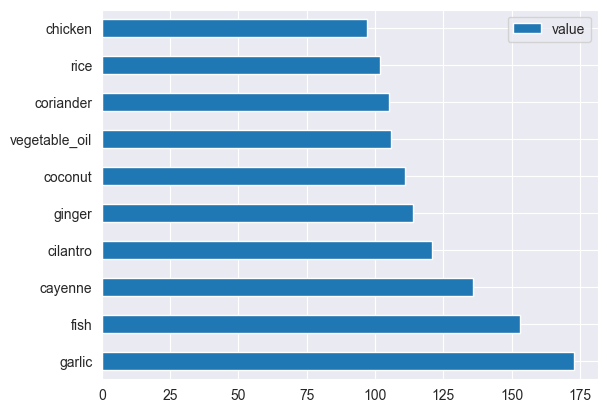

In [11]:
thai_ingredient_df = create_ingredient_df(thai_df)
# print(thai_ingredient_df)
thai_ingredient_df.head(10).plot.barh()
japanese_ingredient_df = create_ingredient_df(japanese_df)
chinese_ingredient_df = create_ingredient_df(chinese_df)
indian_ingredient_df = create_ingredient_df(indian_df)
korean_ingredient_df = create_ingredient_df(korean_df)

# drop the most common ingredients that create confusion between distinct cuisines
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

### Balance the dataset

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

In [12]:
# Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [13]:
# save your balanced data into files
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


## Cuisine classifiers 1

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np

cuisines_df = pd.read_csv("cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Divide the X and y coordinates into two dataframes for training

In [15]:
# cuisine can be the labels dataframe
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

# the rest of the data as trainable features
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

# Create a logistic regression with multi_class set to ovr and the solver set to liblinear:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
# lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

# Test the model
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

# check for the accuracy of this prediction
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

# classification report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

Accuracy is 0.8073394495412844
ingredients: Index(['apple', 'apricot', 'butter', 'chicken', 'chicken_broth', 'coriander',
       'cumin', 'fenugreek', 'onion', 'peanut_oil', 'pepper', 'raisin',
       'turmeric'],
      dtype='object')
cuisine: indian
              precision    recall  f1-score   support

     chinese       0.73      0.71      0.72       217
      indian       0.88      0.90      0.89       247
    japanese       0.78      0.77      0.78       252
      korean       0.86      0.80      0.83       251
        thai       0.78      0.84      0.81       232

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.80      1199
weighted avg       0.81      0.81      0.81      1199



D:\SafeWorkspace\Softwares\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\SafeWorkspace\Softwares\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Cuisine classifiers 2

### split the data

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


### Apply:   linear SVC, K-Neighbors classifier, Support Vector Classifier

In [27]:
C = 10
# Create different classifiers.
classifiers = {
    'SVC': SVC(),
    'KNN classifier': KNeighborsClassifier(C),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0)
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for SVC: 82.8% 
              precision    recall  f1-score   support

     chinese       0.78      0.74      0.76       247
      indian       0.93      0.89      0.91       236
    japanese       0.83      0.79      0.81       245
      korean       0.87      0.83      0.85       238
        thai       0.75      0.90      0.82       233

    accuracy                           0.83      1199
   macro avg       0.83      0.83      0.83      1199
weighted avg       0.83      0.83      0.83      1199

Accuracy (train) for KNN classifier: 72.4% 
              precision    recall  f1-score   support

     chinese       0.70      0.66      0.68       247
      indian       0.83      0.78      0.80       236
    japanese       0.66      0.83      0.73       245
      korean       0.89      0.58      0.71       238
        thai       0.65      0.77      0.70       233

    accuracy                           0.72      1199
   macro avg       0.74      0.72      0.72      1199


### Ensemble Classifiers

In [28]:
C = 10
# Create different classifiers.
classifiers = {
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for RFST: 83.7% 
              precision    recall  f1-score   support

     chinese       0.82      0.78      0.80       247
      indian       0.88      0.92      0.90       236
    japanese       0.83      0.79      0.81       245
      korean       0.87      0.84      0.85       238
        thai       0.79      0.86      0.82       233

    accuracy                           0.84      1199
   macro avg       0.84      0.84      0.84      1199
weighted avg       0.84      0.84      0.84      1199

Accuracy (train) for ADA: 68.4% 
              precision    recall  f1-score   support

     chinese       0.62      0.63      0.63       247
      indian       0.83      0.78      0.80       236
    japanese       0.68      0.69      0.68       245
      korean       0.78      0.61      0.69       238
        thai       0.57      0.71      0.63       233

    accuracy                           0.68      1199
   macro avg       0.70      0.68      0.69      1199
weighted a